# Produisez une étude de marché avec R ou Python (deuxième partie)

## Sommaire

#### 1.Préparation des données

1.1 Standardisation des données

#### 2.Clustering

2.1 Classification ascendante hiérarchique 

2.2 KMEANS

#### 3.Conclusion

3.1 Choix de la méthode

3.2 Recommandations
    
    3.2.1 Cercle de corrélation
    3.2.2 Projection des individus
    3.2.3 Centroids
3.3 Conclusion et recommandations

Dans le cadre de la continuité de mon projet, j'importe de nouveau les librairies dont je vais avoir besoin pour la suite de mon analyse. 

Il faut que j'importe ma table finale sur laquelle j'ai fais mes premières analyses.

Dans cette partie on va préparer nos données pour les méthodes de classification hiérarchique ascendante et de clustering KMEANS.

In [1]:
#Import des librairies nécessaire au projet (ajout au fur et à mesure)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import decomposition, preprocessing
from sklearn import datasets
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import os
os.environ["OMP_NUM_THREADS"] = "1"
%pip install yellowbrick

In [2]:
#Import du fichier csv pour la partie clustering
jointure_total = pd.read_csv(r"C:\Users\jogrv\OneDrive\Documents\Openclassroom\Produisez une étude de marché avec R ou Python\DAN-P9-data\jointure_total.csv")

# 1.Préparation des données

Préparartion des données, avec la séparation des données les pays d'un côté et les autres variables de l'autre.

Après cela on vérifie les données que nous avons, la dimension de mon dataframe, l'intégration des données dans un objet.

Les pays d'un côté dans "names" et le reste des données dans l'autre "features"

In [3]:
#Séparation des données de mon DataFrame.
jointure_total.fillna(0, inplace = True) #Imputer les valeurs manquantes
Y = jointure_total['Zone'].values
X = jointure_total.drop('Zone', axis = 1).values
X[:5]

array([[ 6.95752883e+00,  2.09610000e+03,  3.62961130e+07,
        -2.80000000e+00,  0.00000000e+00,  2.90000000e+01,
         0.00000000e+00,  0.00000000e+00],
       [ 6.90262850e+00,  1.39505000e+04,  5.70097560e+07,
        -2.80000000e-01,  6.30000000e+01,  5.14000000e+02,
         0.00000000e+00,  0.00000000e+00],
       [ 3.92457750e+00,  1.27710000e+04,  2.88416900e+06,
         3.80000000e-01,  0.00000000e+00,  3.80000000e+01,
         0.00000000e+00,  0.00000000e+00],
       [ 5.04049583e+00,  1.18095000e+04,  4.13891890e+07,
        -9.20000000e-01,  0.00000000e+00,  2.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 2.76249683e+00,  5.30715000e+04,  8.26584090e+07,
         5.90000000e-01,  6.46000000e+02,  8.42000000e+02,
        -3.80000000e+01,  1.67000000e+02]])

In [4]:
#Verification du type de donnée de X.
type(X)

numpy.ndarray

In [5]:
#Vérification des dimensions de mon dataframe.
X.shape

(163, 8)

In [6]:
#Intégration de Y à un objet
names = Y
names

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize',
       'Bosnie-Herzégovine', 'Botswana', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge',
       'Cameroun', 'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chypre', 'Colombie', 'Congo',
       'Costa Rica', 'Croatie', "Côte d'Ivoire", 'Danemark', 'Djibouti',
       'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini',
       'Fidji', 'Finlande', 'France', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Géorgie', 'Haïti', 'Honduras', 'Hongrie', 'Inde',
       'Indonésie', 'Iraq', 'Irlande', 'Islande', 'Israël', 'Italie',
       'Jamaïque', 'Japon', 'Jordanie', 'Kaz

In [7]:
#Les autres variables sans la colonne "Zone", dans un objet features.
features = jointure_total.drop('Zone',axis=1).columns
features

Index(['inflation', 'pib', 'Population', 'stabilite_politique',
       'Exportations - Quantité', 'Importations - Quantité', 'Résidus',
       'Traitement'],
      dtype='object')

#### 1.1 Standardisation des données

In [8]:
#Mise à l'échelle des données avec la fonction StandardScaler()
scaler = StandardScaler()

In [9]:
#calculer les parametres du modèle qui est censé etre suivi
scaler.fit(X)

StandardScaler()

In [10]:
#Standardisation des données avec .transform()
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[ 0.3683017 , -0.87602469,  0.00816895, -3.04098603, -0.22605484,
        -0.3126338 ,  0.2096354 , -0.23725044],
       [ 0.35985752, -0.30585328,  0.19110021, -0.2466694 , -0.09120981,
         2.28569098,  0.2096354 , -0.23725044],
       [-0.09819441, -0.36258472, -0.28690658,  0.48517544, -0.22605484,
        -0.26441747,  0.2096354 , -0.23725044],
       [ 0.0734442 , -0.40883082,  0.05314813, -0.95633711, -0.22605484,
        -0.45728281,  0.2096354 , -0.23725044],
       [-0.27693322,  1.57578357,  0.41761471,  0.71803516,  1.15664177,
         4.04290857, -2.58881643,  5.1089369 ]])

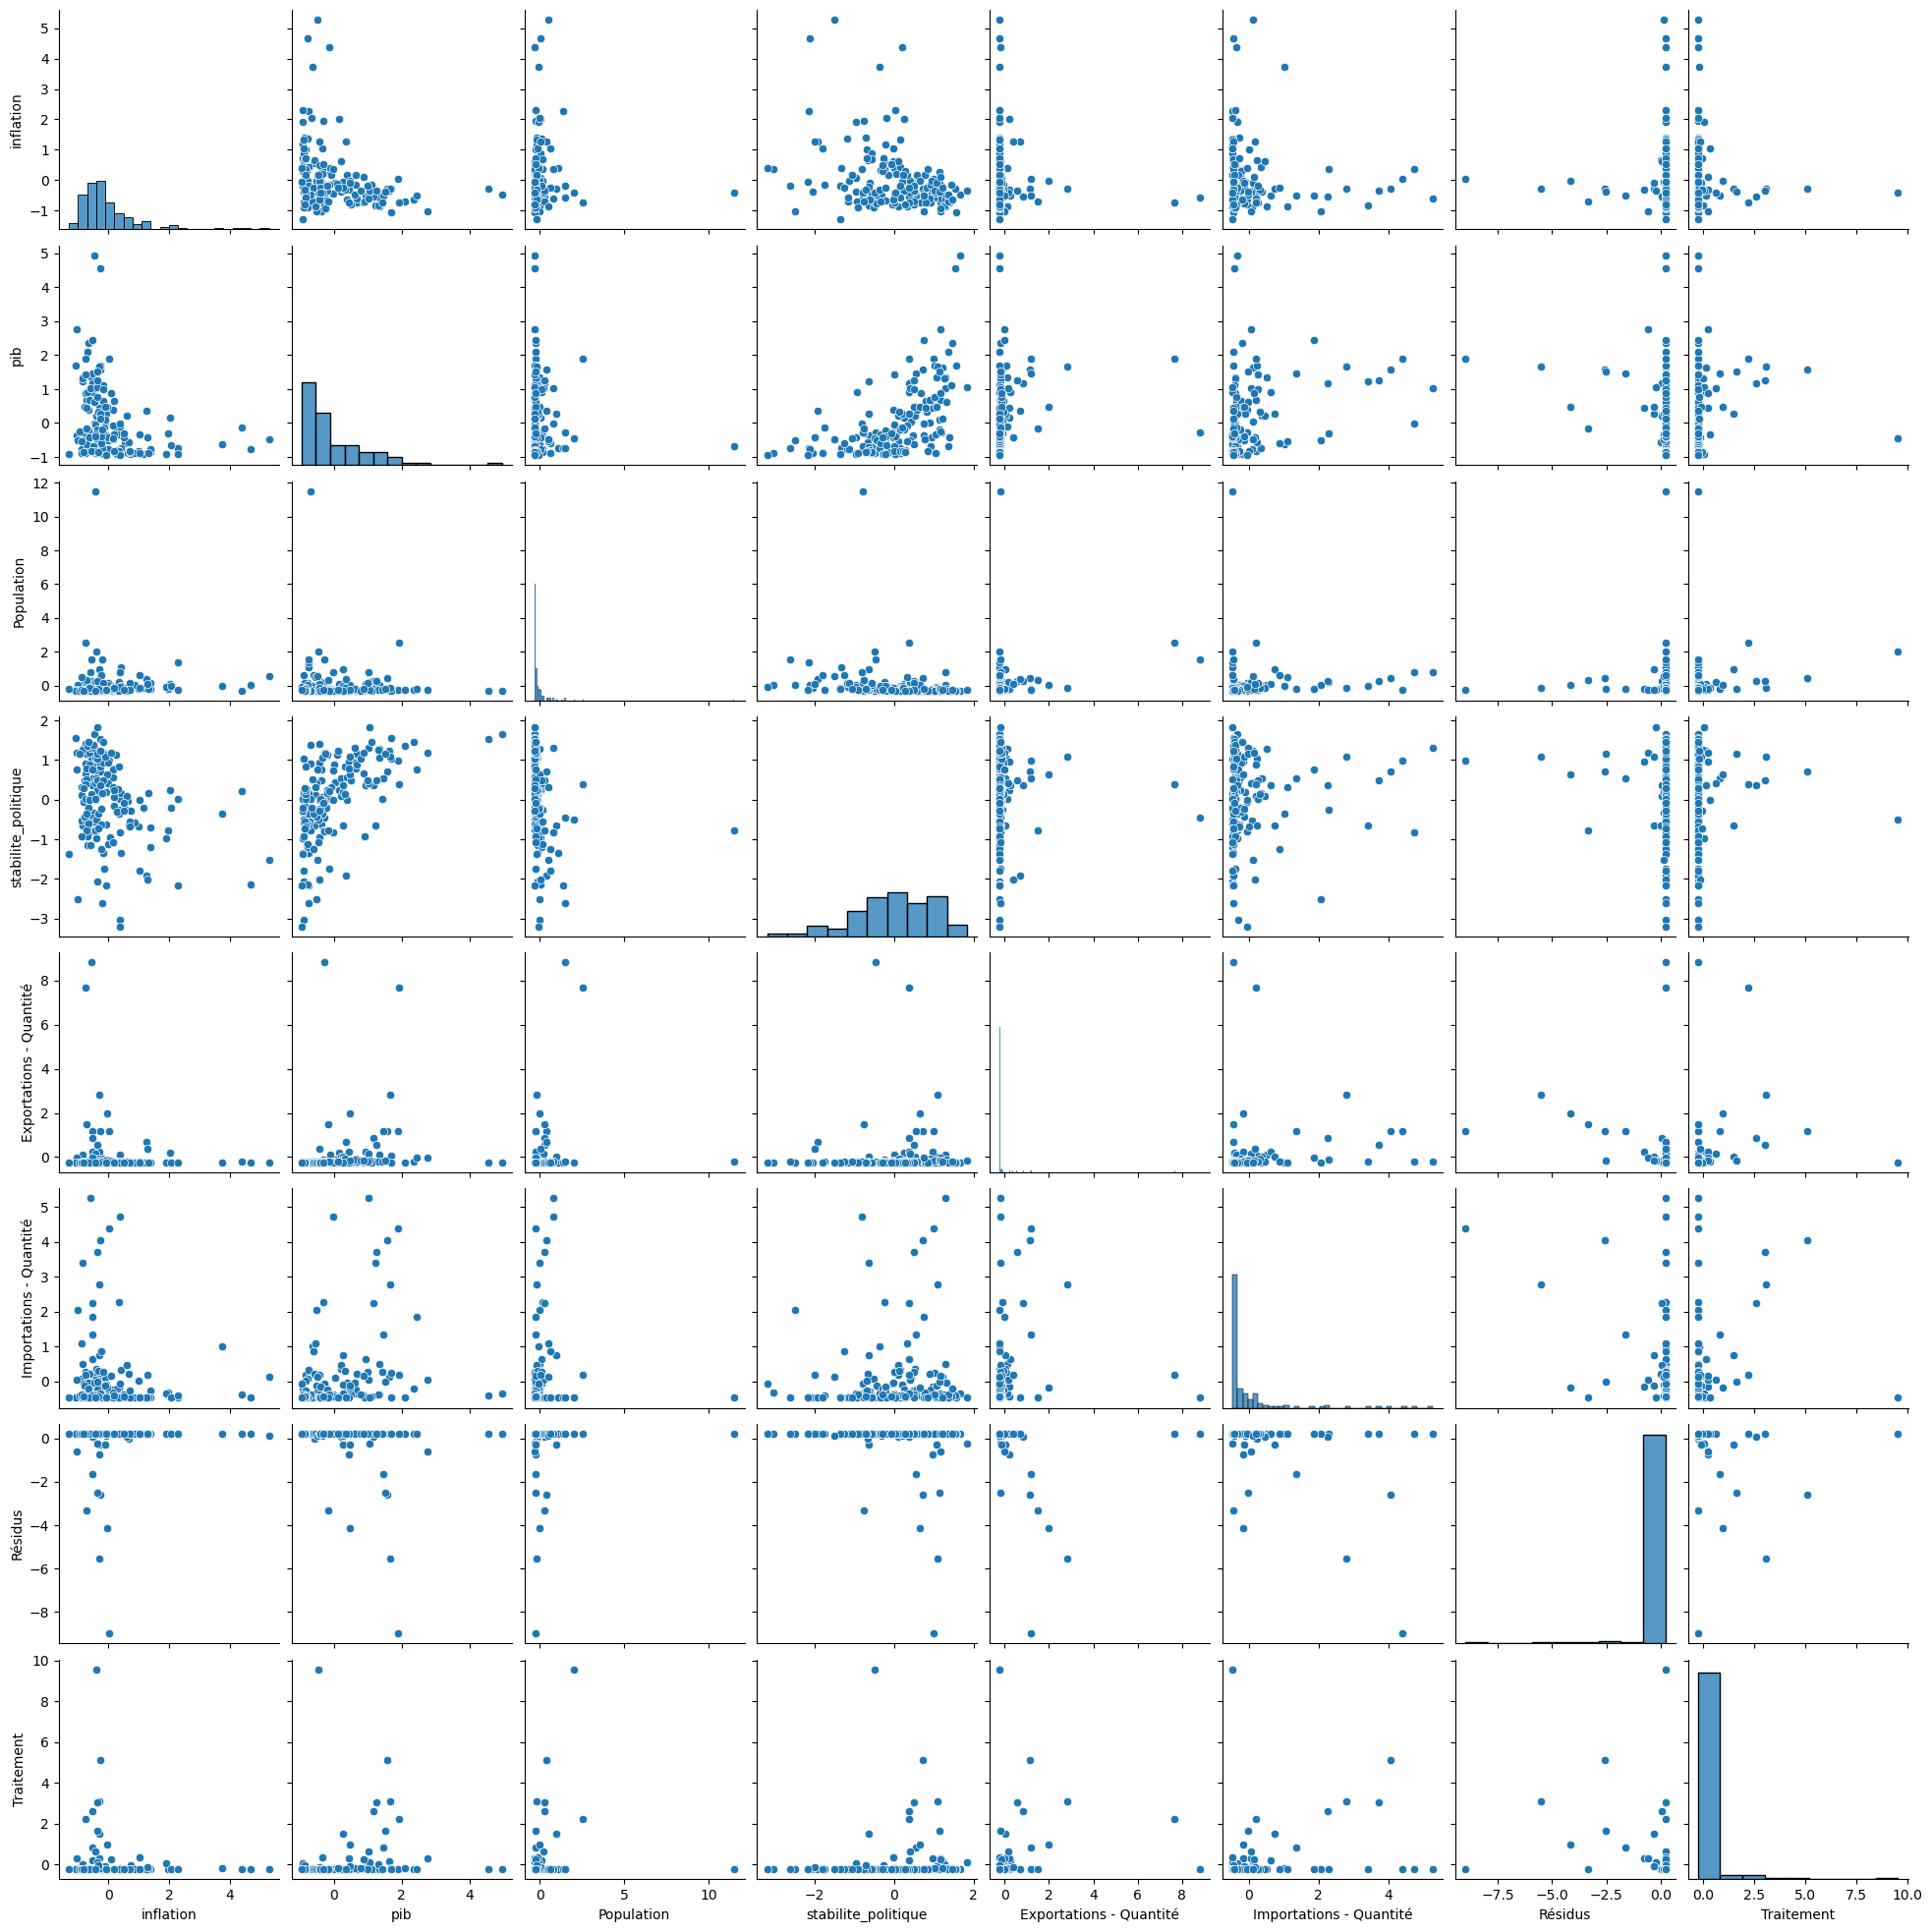

In [11]:
#rajout des noms de variable en reconstituant un dataframe
graph_pairplot = pd.DataFrame(X_scaled)
graph_pairplot.columns = features
sns.pairplot(graph_pairplot)
plt.show()

Après standardisation des données, j'affiche de nouveau mes données dans mon pairplot, celui-ci me permet de voir que les données suivent une loi normale.

Je réalise ensuite une vérification pour voir si mes données sont bien standardiser, en affichant la moyenne et l'écart type.

In [12]:
#Vérification de la standardisation, avec la moyenne et l'écart type.
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# 2.Clustering

####  2.1 Classification hiérarchique ascendante (dendogramme)

J'utilise la méthode de la classification hiérarchique ascendante, cette méthode permet l'analyse de données non supervisée utilisée en apprentissage automatique et en statistiques pour regrouper des objets similaires dans des clusters ou des groupes. Cette méthode cherche à diviser un ensemble de données en clusters de manière hiérarchique, en créant une structure arborescente de regroupements

J'utilise le dendogramme pour afficher cette méthode. Un dendrogramme est un arbre de représentation graphique où les feuilles représentent les objets individuels et les nœuds internes représentent les regroupements successifs

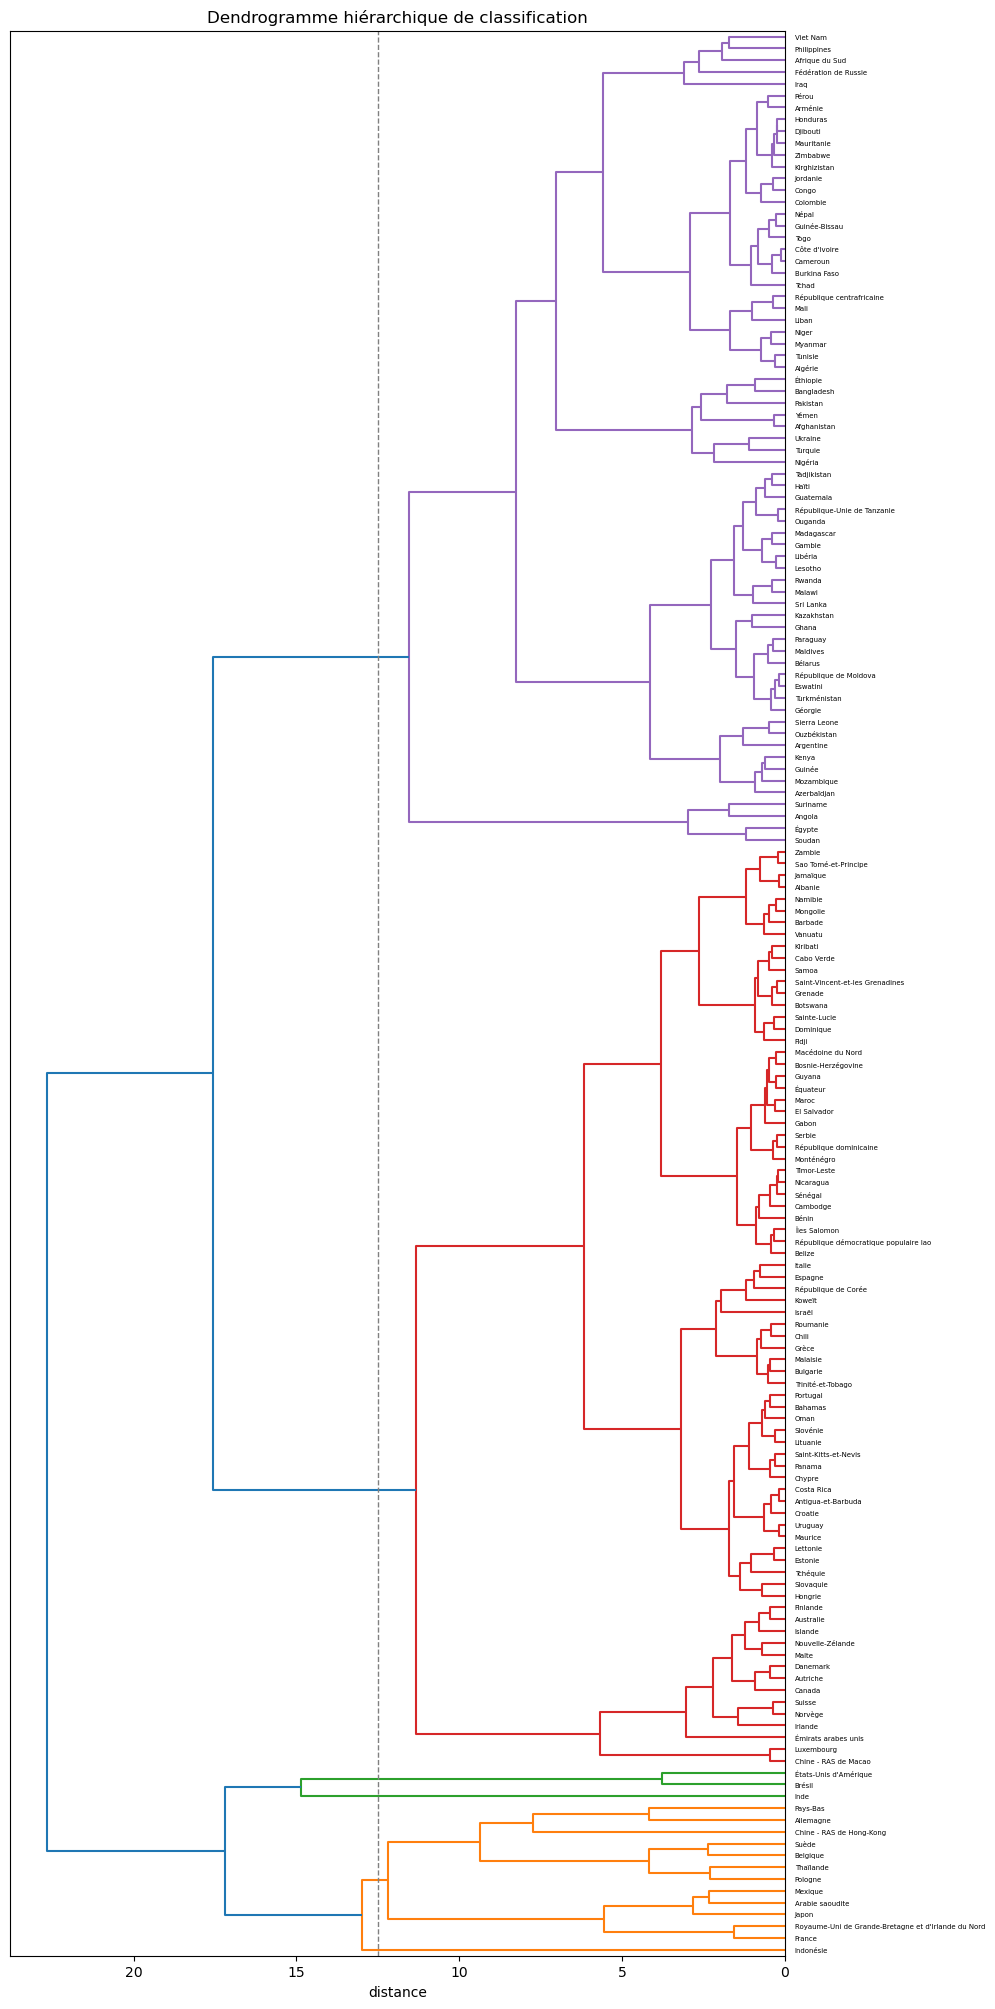

In [13]:
#Dendogramme
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plt.figure(figsize=(10,25))
dendrogram(Z,labels = names,orientation = "left")
plt.axvline(x=12.5, c='grey', lw=1, linestyle='dashed') # Threshold
plt.title('Dendrogramme hiérarchique de classification')
plt.xlabel('distance')
plt.show()

Les lignes horizontales représentes les clusters qui fonctionnent à chaque étape. La hauteur à laquelle deux lignes horizontales se fusionnent indique la similarité entre les clusters. Plus la hauteur est grande, plus la dissimilarité est grande.

Les branches du dendrogramme représentent les groupes ou clusters formés à chaque étape de la fusion. Les feuilles du dendrogramme sont les observations individuelles.

Je peux voir qu'il y a 4 clusters bien dinstinct, regroupant des pays qui ont des similiarités. 

In [14]:
#afficher le dataframe avec un index Zone, pour pouvoir afficher les clusters par groupe
df = jointure_total.set_index('Zone')
df

,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement
Zone,,,,,,,,
Afghanistan,6.957529,2096.1,36296113.0,-2.80,0.0,29.0,0.0,0.0
Afrique du Sud,6.902628,13950.5,57009756.0,-0.28,63.0,514.0,0.0,0.0
Albanie,3.924577,12771.0,2884169.0,0.38,0.0,38.0,0.0,0.0
Algérie,5.040496,11809.5,41389189.0,-0.92,0.0,2.0,0.0,0.0
Allemagne,2.762497,53071.5,82658409.0,0.59,646.0,842.0,-38.0,167.0
...,...,...,...,...,...,...,...,...
Éthiopie,11.285758,1988.0,106399924.0,-1.68,0.0,1.0,0.0,0.0
Îles Salomon,-0.649605,2625.1,636039.0,0.20,0.0,6.0,0.0,0.0
Guyana,1.900000,12193.6,775222.0,-0.04,0.0,0.0,0.0,0.0


In [15]:
#Coupage du dendrogramme en 4 clusters
clusters = fcluster(Z, 4, criterion='maxclust')

Je décide d'afficher les 4 clusters avec les pays afin d'avoir plus de précision sur les clusters et les pays qui représentent le cluster.

In [16]:
#Exploration des différents cluters
for i in range(1,5):
    print(f"Group {i}:")
    print(", ".join(df.index[clusters == i].sort_values())) 
    print(" ")

Group 1:
Allemagne, Arabie saoudite, Belgique, Chine - RAS de Hong-Kong, France, Indonésie, Japon, Mexique, Pays-Bas, Pologne, Royaume-Uni de Grande-Bretagne et d'Irlande du Nord, Suède, Thaïlande
 
Group 2:
Brésil, Inde, États-Unis d'Amérique
 
Group 3:
Albanie, Antigua-et-Barbuda, Australie, Autriche, Bahamas, Barbade, Belize, Bosnie-Herzégovine, Botswana, Bulgarie, Bénin, Cabo Verde, Cambodge, Canada, Chili, Chine - RAS de Macao, Chypre, Costa Rica, Croatie, Danemark, Dominique, El Salvador, Espagne, Estonie, Fidji, Finlande, Gabon, Grenade, Grèce, Guyana, Hongrie, Irlande, Islande, Israël, Italie, Jamaïque, Kiribati, Koweït, Lettonie, Lituanie, Luxembourg, Macédoine du Nord, Malaisie, Malte, Maroc, Maurice, Mongolie, Monténégro, Namibie, Nicaragua, Norvège, Nouvelle-Zélande, Oman, Panama, Portugal, Roumanie, République de Corée, République dominicaine, République démocratique populaire lao, Saint-Kitts-et-Nevis, Saint-Vincent-et-les Grenadines, Sainte-Lucie, Samoa, Sao Tomé-et-Prin

In [17]:
# Ajout des clusters au df principal.
df = df.copy()
df['cluster'] = clusters
df

,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement,cluster
Zone,,,,,,,,,
Afghanistan,6.957529,2096.1,36296113.0,-2.80,0.0,29.0,0.0,0.0,4
Afrique du Sud,6.902628,13950.5,57009756.0,-0.28,63.0,514.0,0.0,0.0,4
Albanie,3.924577,12771.0,2884169.0,0.38,0.0,38.0,0.0,0.0,3
Algérie,5.040496,11809.5,41389189.0,-0.92,0.0,2.0,0.0,0.0,4
Allemagne,2.762497,53071.5,82658409.0,0.59,646.0,842.0,-38.0,167.0,1
...,...,...,...,...,...,...,...,...,...
Éthiopie,11.285758,1988.0,106399924.0,-1.68,0.0,1.0,0.0,0.0,4
Îles Salomon,-0.649605,2625.1,636039.0,0.20,0.0,6.0,0.0,0.0,3
Guyana,1.900000,12193.6,775222.0,-0.04,0.0,0.0,0.0,0.0,3


Je calcule la moyenne de chaque variable par clusters, ces informations me serviront ensuite pour réaliser un heatmap qui permettra d'avoir la corrélation de chaque variable par clusters. Cela servira à choisir sur quel cluster mon choix se porte.

In [18]:
#Moyenne des variables non standardisées, par clusters.
moy_var = df.groupby(['cluster']).mean().reset_index()
moy_var

,cluster,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement
0,1,2.308646,40501.707692,7.054430e+07,0.258462,470.461538,529.615385,-31.692308,69.076923
1,2,0.858601,26834.933333,6.238651e+08,-0.313333,2639.666667,42.000000,0.000000,25.666667
2,3,1.837680,27790.892308,7.977326e+06,0.555641,24.128205,44.717949,-0.500000,1.717949
3,4,8.229577,7764.176812,3.412451e+07,-0.799130,18.811594,54.202899,-0.188406,1.434783


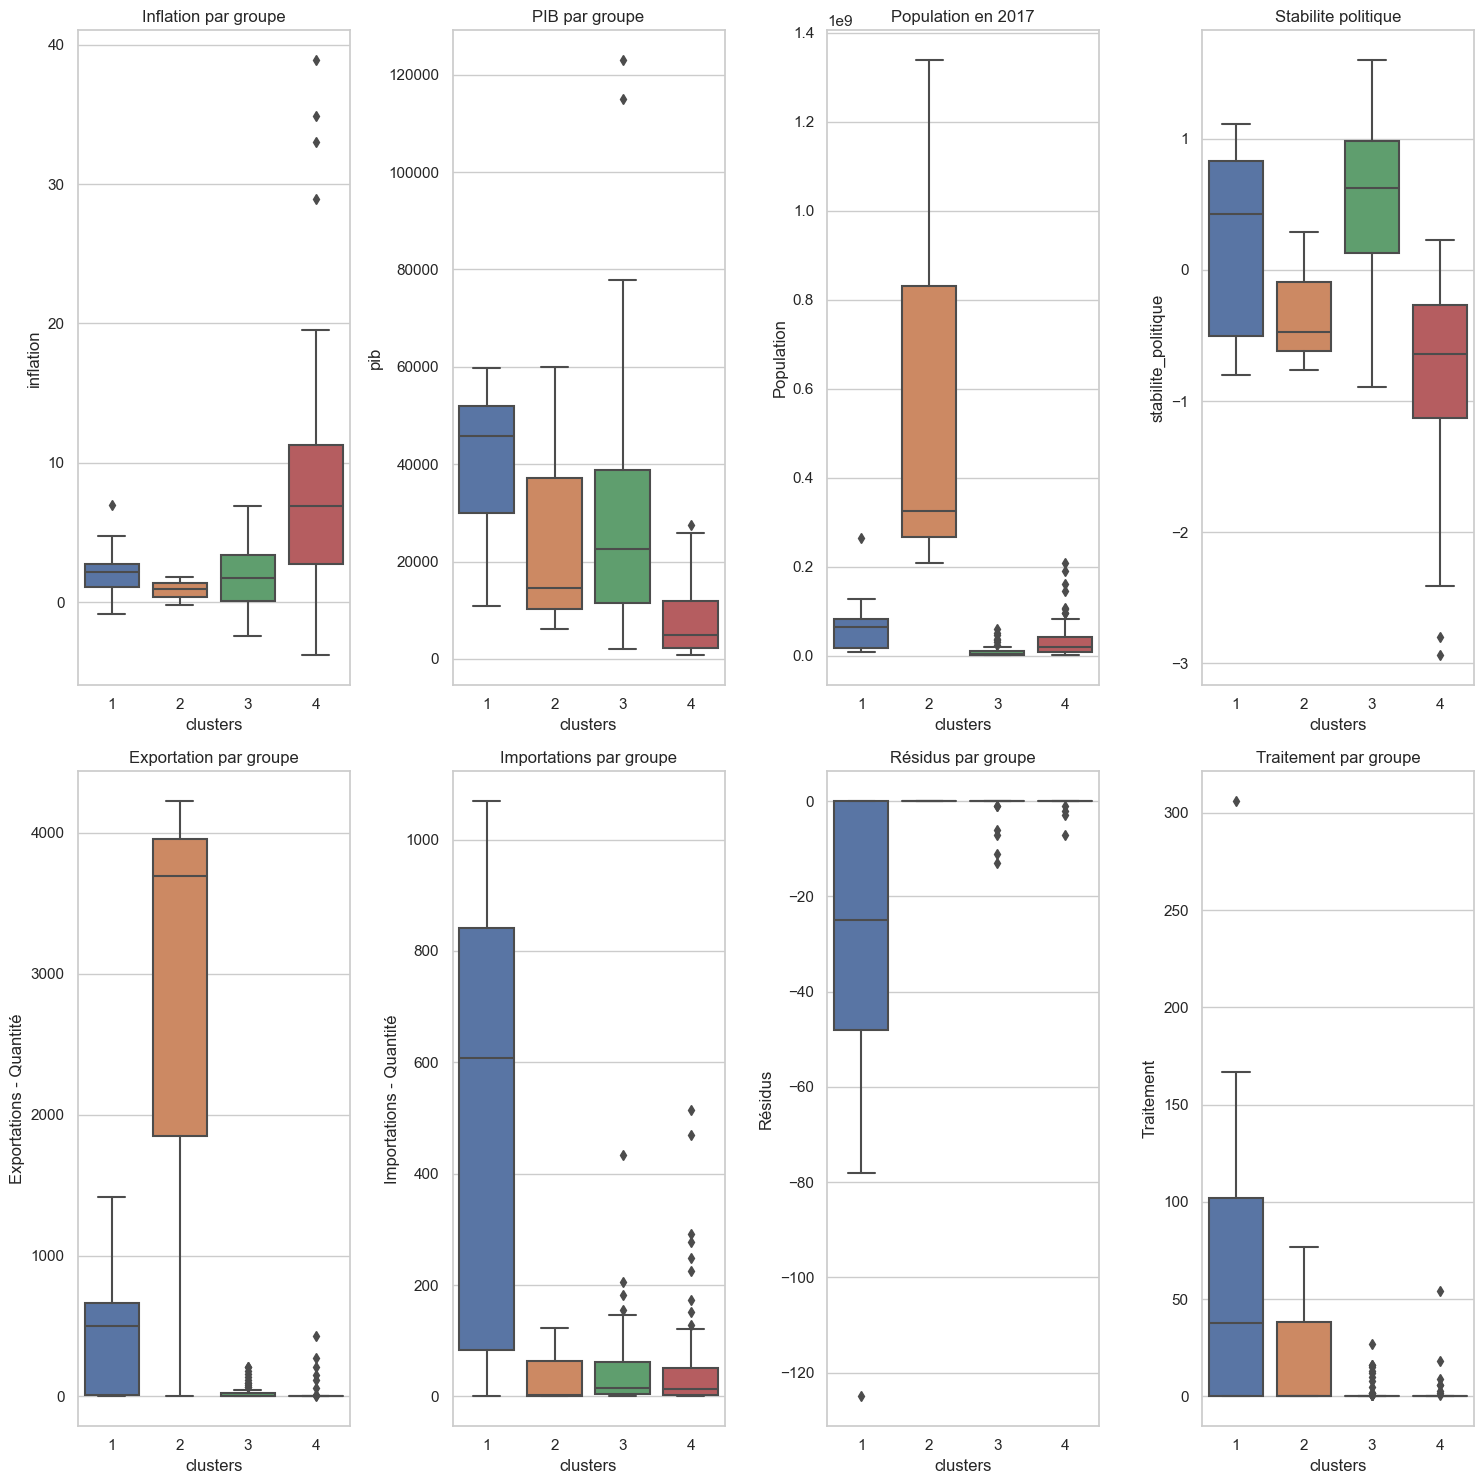

In [19]:
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")

plt.subplot(241)
sns.boxplot(x="cluster", y="inflation", data=df)
plt.title('Inflation par groupe')
plt.xlabel('clusters')

plt.subplot(242)
sns.boxplot(x="cluster", y="pib", data=df)
plt.title('PIB par groupe')
plt.xlabel('clusters')

plt.subplot(243)
sns.boxplot(x="cluster", y="Population", data=df)
plt.title('Population en 2017')
plt.xlabel('clusters')

plt.subplot(244)
sns.boxplot(x="cluster", y="stabilite_politique", data=df)
plt.title('Stabilite politique')
plt.xlabel('clusters')

plt.subplot(245)
sns.boxplot(x="cluster", y="Exportations - Quantité", data=df)
plt.title('Exportation par groupe')
plt.xlabel('clusters')

plt.subplot(246)
sns.boxplot(x="cluster", y="Importations - Quantité", data=df)
plt.title('Importations par groupe')
plt.xlabel('clusters')

plt.subplot(247)
sns.boxplot(x="cluster", y="Résidus", data=df)
plt.title('Résidus par groupe')
plt.xlabel('clusters')

plt.subplot(248)
sns.boxplot(x="cluster", y="Traitement", data=df)
plt.title('Traitement par groupe')
plt.xlabel('clusters')

plt.tight_layout()  # Pour ajuster l'espacement entre les sous-graphiques
plt.show(block=False)

Je décide ensuite d'afficher un headmap pour voir sur quel cluster les variables que j'ai choisi sont les plus corrélés.

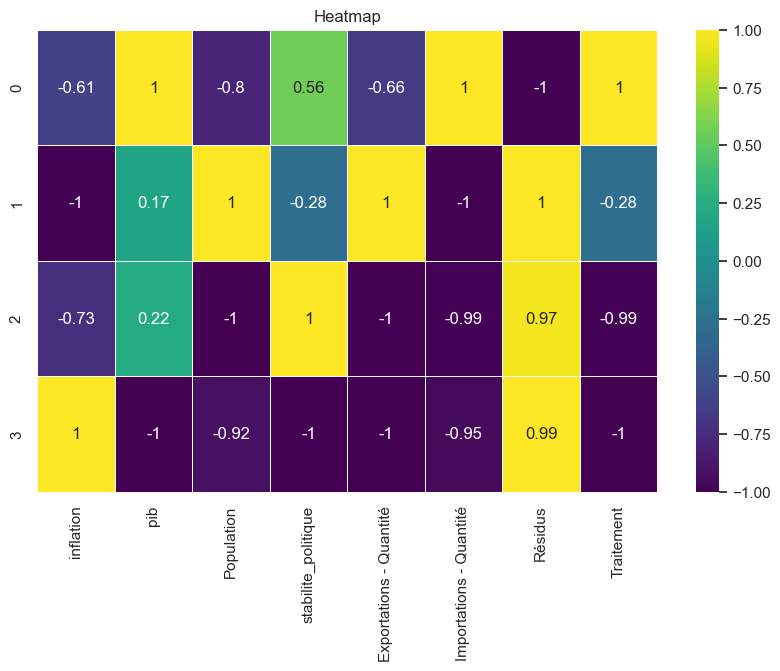

In [20]:
#Normaliser les moyennes 
scaler = MinMaxScaler(feature_range=(-1, 1))
normalized_moy_var = pd.DataFrame(scaler.fit_transform(moy_var), columns=moy_var.columns, index=moy_var.index)

#Afficher le heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_moy_var.drop('cluster', axis=1), annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap')
plt.show()

Conclusion sur les clusters

Cluster 1 : pays avec inflation plutôt correct, bon PIB, population aussi correct, une bonne stabilité politique, des exportations correctes, de très bonnes importations, mauvais résidus et très bon traitement.

Cluster 2 : pays avec faible inflation, un PIB correct, une population assez éléve ainsi que d'importantes exportations mais une stabilité politique et des importations pas très hautes. Des rédidus et traitements corrects

Cluster 3 : Inflation importante, PIB et stabilité politique très faible, population,importation/exportation et traitement assez faible dans ces pays, mais beaucoup de résidus.

Cluster 4 : Pays avec PIB correct, stabilité politique très bonne, résidus correct, inflation, population , export/import et traitement très moyenne.

Avec la méthode de la classification hiérarchique ascendante, le cluster numéro 1 me paraît le mieux pour répondre aux critères de l'export. 

Ce cluster montre que les pays ont de très bonnes importations, bon traitement de matiére, avec un PIB correct et une bonne population.

Je décide d'apporte plus de précision en montrant les pays correspondant au cluster, je vais faire une sélection de 5 pays avec une bonne stabilité politique et de bonnes importations.

In [21]:
#Affichage des pays contenant ce clusters
Choix_Pays = df[df['cluster']==1]
Choix_Pays

,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement,cluster
Zone,,,,,,,,,
Allemagne,2.762497,53071.5,82658409.0,0.59,646.0,842.0,-38.0,167.0,1
Arabie saoudite,-0.821562,45795.5,33101178.0,-0.64,10.0,722.0,0.0,0.0,1
Belgique,1.266698,50442.3,11419748.0,0.43,656.0,338.0,-25.0,33.0,1
Chine - RAS de Hong-Kong,4.734606,59842.2,7306322.0,0.83,663.0,907.0,-125.0,0.0,1
France,1.088588,44577.1,64842509.0,0.28,501.0,506.0,-2.0,89.0,1
Indonésie,1.926709,10941.9,264650963.0,-0.50,0.0,1.0,0.0,306.0,1
Japon,0.698263,41444.2,127502725.0,1.11,10.0,1069.0,0.0,0.0,1
Mexique,6.966624,20032.4,124777324.0,-0.80,9.0,972.0,0.0,0.0,1
Pays-Bas,2.664325,55088.6,17021347.0,0.92,1418.0,608.0,-78.0,104.0,1


In [22]:
#Je restreint sur dix pays avec une bonne stabilité politique
choix_pays_stabilite = Choix_Pays.sort_values(by = ['stabilite_politique'], ascending = False)
choix_pays_stabilite_10 = choix_pays_stabilite.iloc[0:10]
choix_pays_stabilite_10

,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement,cluster
Zone,,,,,,,,,
Japon,0.698263,41444.2,127502725.0,1.11,10.0,1069.0,0.0,0.0,1
Suède,2.143091,51948.0,9904896.0,0.98,23.0,84.0,-37.0,59.0,1
Pays-Bas,2.664325,55088.6,17021347.0,0.92,1418.0,608.0,-78.0,104.0,1
Chine - RAS de Hong-Kong,4.734606,59842.2,7306322.0,0.83,663.0,907.0,-125.0,0.0,1
Allemagne,2.762497,53071.5,82658409.0,0.59,646.0,842.0,-38.0,167.0,1
Pologne,4.314900,29958.1,37953180.0,0.52,1025.0,55.0,-59.0,38.0,1
Belgique,1.266698,50442.3,11419748.0,0.43,656.0,338.0,-25.0,33.0,1
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,2.261151,46372.4,66727460.0,0.39,359.0,779.0,0.0,102.0,1
France,1.088588,44577.1,64842509.0,0.28,501.0,506.0,-2.0,89.0,1


In [23]:
# Classsement par quantité de volaille importée
choix_pays_5 = choix_pays_stabilite_10.sort_values(by = ['Importations - Quantité'], ascending = False)
# Selection des 5 premiers pays
choix_pays_5 = choix_pays_5.iloc[0:5]
choix_pays_5

,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement,cluster
Zone,,,,,,,,,
Japon,0.698263,41444.2,127502725.0,1.11,10.0,1069.0,0.0,0.0,1
Chine - RAS de Hong-Kong,4.734606,59842.2,7306322.0,0.83,663.0,907.0,-125.0,0.0,1
Allemagne,2.762497,53071.5,82658409.0,0.59,646.0,842.0,-38.0,167.0,1
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,2.261151,46372.4,66727460.0,0.39,359.0,779.0,0.0,102.0,1
Pays-Bas,2.664325,55088.6,17021347.0,0.92,1418.0,608.0,-78.0,104.0,1


Les pays qui ressortent avec la classification hiérarchique ascendante sont des pays européens et quelques pays asiatiques.

La méthode du dendogramme dégage 4 clusters, avec un cluster contenant que 3 pays. Cette méthode n'est pour moi pas la plus pertinante car ce cluster de 3 pays peut fausser notre analyse global.

#### 2.2 Méthode KMEANS

KMEANS est un algorithme de clustering largement utilisé en apprentissage automatique non supervisé. Son objectif est de partitionner un ensemble de données en k groupes (clusters) de manière à minimiser la variance intra-cluster et à maximiser la variance inter-cluster.

In [24]:
#afficher le dataframe avec un index Zone, pour pouvoir afficher les clusters par groupe
df_kmeans = jointure_total.set_index('Zone')
df_kmeans

,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement
Zone,,,,,,,,
Afghanistan,6.957529,2096.1,36296113.0,-2.80,0.0,29.0,0.0,0.0
Afrique du Sud,6.902628,13950.5,57009756.0,-0.28,63.0,514.0,0.0,0.0
Albanie,3.924577,12771.0,2884169.0,0.38,0.0,38.0,0.0,0.0
Algérie,5.040496,11809.5,41389189.0,-0.92,0.0,2.0,0.0,0.0
Allemagne,2.762497,53071.5,82658409.0,0.59,646.0,842.0,-38.0,167.0
...,...,...,...,...,...,...,...,...
Éthiopie,11.285758,1988.0,106399924.0,-1.68,0.0,1.0,0.0,0.0
Îles Salomon,-0.649605,2625.1,636039.0,0.20,0.0,6.0,0.0,0.0
Guyana,1.900000,12193.6,775222.0,-0.04,0.0,0.0,0.0,0.0


J'ai lancé ma méthode et celle-ci m'a proposé 3 cluster dont l'un avec uniquement l'Inde.

Je décide de le supprimer ce pays, car avoir un cluster avec uniquement 1 pays peut fausser mes futures analyses.

In [25]:
#Je met le pays à supprimer dans un objet
pays_a_supprimer = 'Inde'

# Réinitialisez l'index pour faire de 'Zone' une colonne régulière
df_kmeans = df_kmeans.reset_index()

# Supprimez la ligne correspondant au pays spécifique
df_kmeans = df_kmeans[df_kmeans['Zone'] != pays_a_supprimer]

In [26]:
#Je remets zone en index
df_kmeans.set_index('Zone', inplace=True)
df_kmeans

,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement
Zone,,,,,,,,
Afghanistan,6.957529,2096.1,36296113.0,-2.80,0.0,29.0,0.0,0.0
Afrique du Sud,6.902628,13950.5,57009756.0,-0.28,63.0,514.0,0.0,0.0
Albanie,3.924577,12771.0,2884169.0,0.38,0.0,38.0,0.0,0.0
Algérie,5.040496,11809.5,41389189.0,-0.92,0.0,2.0,0.0,0.0
Allemagne,2.762497,53071.5,82658409.0,0.59,646.0,842.0,-38.0,167.0
...,...,...,...,...,...,...,...,...
Éthiopie,11.285758,1988.0,106399924.0,-1.68,0.0,1.0,0.0,0.0
Îles Salomon,-0.649605,2625.1,636039.0,0.20,0.0,6.0,0.0,0.0
Guyana,1.900000,12193.6,775222.0,-0.04,0.0,0.0,0.0,0.0


J'utilise la méthode des coudes qui est une technique couramment utilisée pour choisir le nombre optimal de clusters k dans l'algorithme des k-moyennes. 

Son nom vient de la forme que le graphique de la variance intra-cluster en fonction du nombre de clusters peut parfois avoir, ressemblant à un coude.

In [59]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k,n_init=10)
    
    # On entraine
    kmeans.fit(df_kmeans)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

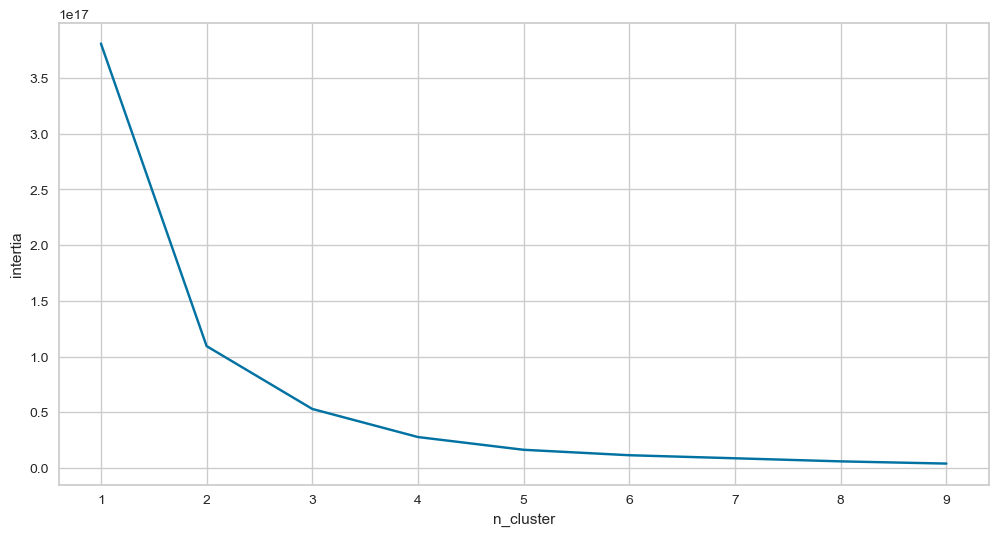

In [60]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

Après la visualisation du graphique, je définit le nombre optimal de cluster à 3. 

Ce nombre de clusters permet dans notre cas d'avoir 3 clusters de pays bien distinct pour faire des recommandations et un choix final.

In [62]:
#On définit le nombre de clusters optimal de 3
km = KMeans(n_clusters=3, n_init=10)
km.fit(df_kmeans)
clusters_km = km.labels_

In [30]:
df_kmeans['cluster_km'] = clusters_km
df_kmeans

,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement,cluster_km
Zone,,,,,,,,,
Afghanistan,6.957529,2096.1,36296113.0,-2.80,0.0,29.0,0.0,0.0,0
Afrique du Sud,6.902628,13950.5,57009756.0,-0.28,63.0,514.0,0.0,0.0,2
Albanie,3.924577,12771.0,2884169.0,0.38,0.0,38.0,0.0,0.0,0
Algérie,5.040496,11809.5,41389189.0,-0.92,0.0,2.0,0.0,0.0,2
Allemagne,2.762497,53071.5,82658409.0,0.59,646.0,842.0,-38.0,167.0,2
...,...,...,...,...,...,...,...,...,...
Éthiopie,11.285758,1988.0,106399924.0,-1.68,0.0,1.0,0.0,0.0,2
Îles Salomon,-0.649605,2625.1,636039.0,0.20,0.0,6.0,0.0,0.0,0
Guyana,1.900000,12193.6,775222.0,-0.04,0.0,0.0,0.0,0.0,0


In [31]:
#Regroupement des pays par clusters
for i in range(0,3):
    print(f"Group {i}:")
    print(", ".join(df_kmeans.index[clusters_km == i].sort_values())) 
    print(" ")

Group 0:
Afghanistan, Albanie, Angola, Antigua-et-Barbuda, Arabie saoudite, Arménie, Australie, Autriche, Azerbaïdjan, Bahamas, Barbade, Belgique, Belize, Bosnie-Herzégovine, Botswana, Bulgarie, Burkina Faso, Bélarus, Bénin, Cabo Verde, Cambodge, Cameroun, Canada, Chili, Chine - RAS de Hong-Kong, Chine - RAS de Macao, Chypre, Congo, Costa Rica, Croatie, Côte d'Ivoire, Danemark, Djibouti, Dominique, El Salvador, Estonie, Eswatini, Fidji, Finlande, Gabon, Gambie, Ghana, Grenade, Grèce, Guatemala, Guinée, Guinée-Bissau, Guyana, Géorgie, Haïti, Honduras, Hongrie, Iraq, Irlande, Islande, Israël, Jamaïque, Jordanie, Kazakhstan, Kirghizistan, Kiribati, Koweït, Lesotho, Lettonie, Liban, Libéria, Lituanie, Luxembourg, Macédoine du Nord, Madagascar, Malaisie, Malawi, Maldives, Mali, Malte, Maroc, Maurice, Mauritanie, Mongolie, Monténégro, Mozambique, Namibie, Nicaragua, Niger, Norvège, Nouvelle-Zélande, Népal, Oman, Ouzbékistan, Panama, Paraguay, Pays-Bas, Pologne, Portugal, Pérou, Roumanie, Rwa

In [32]:
# Moyenne des variables non standardisées, par cluster, changer le nom ce n'est pas des centroids
moy_var_2 = df_kmeans.groupby(['cluster_km']).mean().reset_index()
moy_var_2

,cluster_km,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement
0,0,3.862528,20482.579389,9.705395e+06,0.087099,41.809160,60.236641,-2.809160,2.824427
1,1,5.037100,18014.785714,2.145092e+08,-0.998571,1147.714286,50.714286,-1.000000,62.428571
2,2,8.362292,20625.470833,6.891025e+07,-0.543333,154.166667,249.708333,-3.708333,16.708333


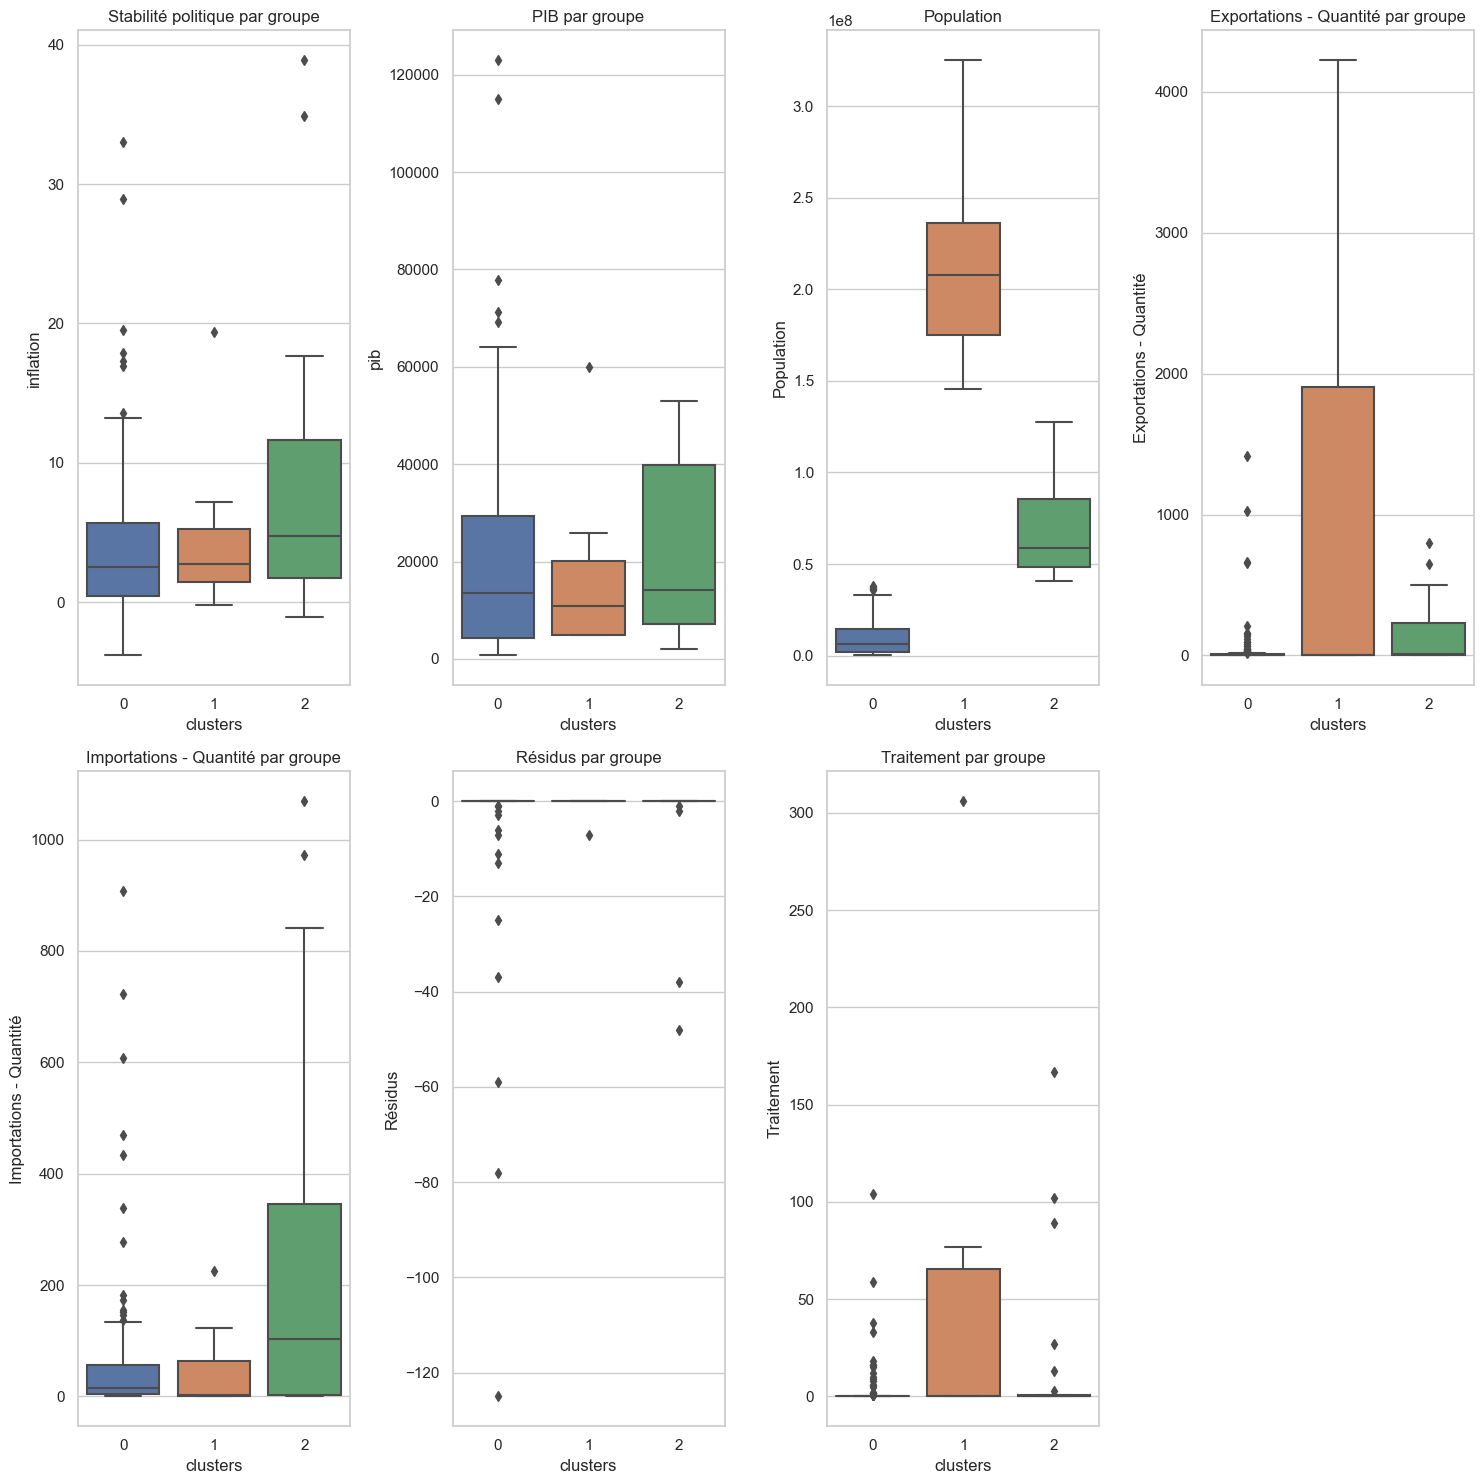

In [33]:
#Visualisation sous forme de boxplot
plt.figure(figsize=(15,15))
sns.set(style="whitegrid")

plt.subplot(241)
sns.boxplot(x="cluster_km", y="inflation", data=df_kmeans)
plt.title('Stabilité politique par groupe')
plt.xlabel('clusters')

plt.subplot(242)
sns.boxplot(x="cluster_km", y="pib", data=df_kmeans)
plt.title('PIB par groupe')
plt.xlabel('clusters')

plt.subplot(243)
sns.boxplot(x="cluster_km", y="Population", data=df_kmeans)
plt.title('Population')
plt.xlabel('clusters')

plt.subplot(244)
sns.boxplot(x="cluster_km", y="Exportations - Quantité", data=df_kmeans)
plt.title('Exportations - Quantité par groupe')
plt.xlabel('clusters')

plt.subplot(245)
sns.boxplot(x="cluster_km", y="Importations - Quantité", data=df_kmeans)
plt.title('Importations - Quantité par groupe')
plt.xlabel('clusters')

plt.subplot(246)
sns.boxplot(x="cluster_km", y="Résidus", data=df_kmeans)
plt.title('Résidus par groupe')
plt.xlabel('clusters')

plt.subplot(247)
sns.boxplot(x="cluster_km", y="Traitement", data=df_kmeans)
plt.title('Traitement par groupe')
plt.xlabel('clusters')

plt.tight_layout()  # Pour ajuster l'espacement entre les sous-graphiques
plt.show(block=False)

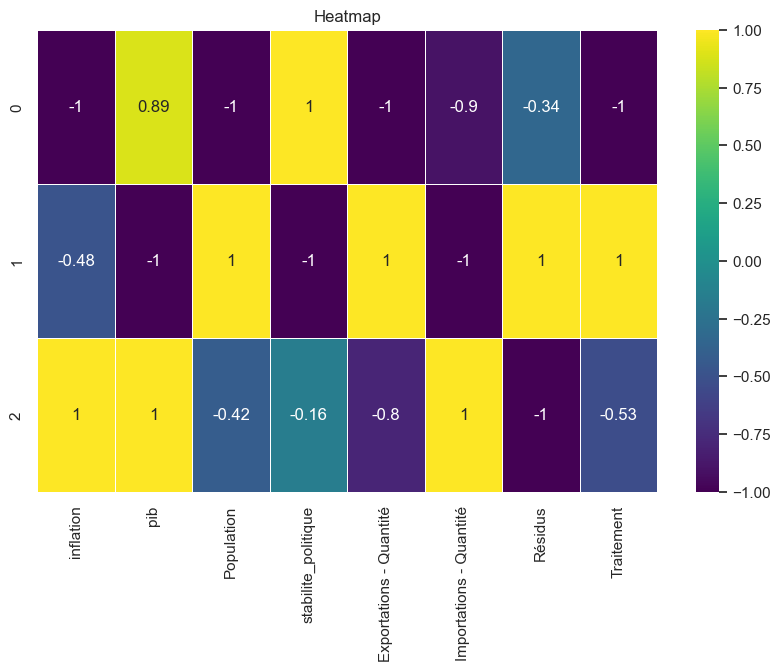

In [34]:
#Normaliser les moyenne
scaler = MinMaxScaler(feature_range=(-1, 1))
normalized_moy_2 = pd.DataFrame(scaler.fit_transform(moy_var_2), columns=moy_var_2.columns, index=moy_var_2.index)

#Afficher le heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_moy_2.drop('cluster_km', axis=1), annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap')
plt.show()

Conclusion sur les clusters:

Clusters 1 : Pays avec un bon PIB et une bonne stabilité politique, mais des mauvais résidus, des imports/exports et traitement corrects

Clusters 2 : pays avec une bonne population mais très instable politiquement et l'inflation est mauvaise, le pib aussi.

Clusters 3 : pays avec un pib correct, de bon résidus, bon export et import ainsi que traitement. Bonne inflation. 

On constate qu'avec la méthode des K-MEANS, le cluster numéro 1 est celui qui correspond le mieux avec de bons import et export, pib aussi.

In [63]:
#Affichage des pays du clusters
Choix_Pays_kmeans = df_kmeans[df_kmeans['cluster_km']==2]
Choix_Pays_kmeans

,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement,cluster_km
Zone,,,,,,,,,
Afrique du Sud,6.902628,13950.5,57009756.0,-0.28,63.0,514.0,0.0,0.0,2
Algérie,5.040496,11809.5,41389189.0,-0.92,0.0,2.0,0.0,0.0,2
Allemagne,2.762497,53071.5,82658409.0,0.59,646.0,842.0,-38.0,167.0,2
Argentine,17.671433,23597.1,43937140.0,0.17,207.0,8.0,0.0,0.0,2
Colombie,0.722020,14334.9,48909839.0,-0.77,2.0,78.0,0.0,0.0,2
Espagne,1.231592,39528.9,46647428.0,0.28,212.0,205.0,0.0,13.0,2
France,1.088588,44577.1,64842509.0,0.28,501.0,506.0,-2.0,89.0,2
Italie,1.880169,41581.1,60673701.0,0.31,183.0,97.0,0.0,27.0,2
Japon,0.698263,41444.2,127502725.0,1.11,10.0,1069.0,0.0,0.0,2


In [64]:
#Je garde les pays avec la meilleure stabilité politique
choix_pays_kmean_stabilite = Choix_Pays_kmeans.sort_values(by = ['stabilite_politique'], ascending = False)
choix_pays_kmean_stabilite_10 = choix_pays_kmean_stabilite.iloc[0:10]
choix_pays_kmean_stabilite_10

,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement,cluster_km
Zone,,,,,,,,,
Japon,0.698263,41444.2,127502725.0,1.11,10.0,1069.0,0.0,0.0,2
Allemagne,2.762497,53071.5,82658409.0,0.59,646.0,842.0,-38.0,167.0,2
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,2.261151,46372.4,66727460.0,0.39,359.0,779.0,0.0,102.0,2
République de Corée,3.421326,40957.4,51096415.0,0.39,6.0,137.0,0.0,0.0,2
Italie,1.880169,41581.1,60673701.0,0.31,183.0,97.0,0.0,27.0,2
Espagne,1.231592,39528.9,46647428.0,0.28,212.0,205.0,0.0,13.0,2
France,1.088588,44577.1,64842509.0,0.28,501.0,506.0,-2.0,89.0,2
Viet Nam,-1.072609,9050.7,94600648.0,0.23,1.0,291.0,0.0,0.0,2
Argentine,17.671433,23597.1,43937140.0,0.17,207.0,8.0,0.0,0.0,2


In [65]:
# Classsement par quantité de volaille importée
choix_pays_kmeans_5 = choix_pays_kmean_stabilite_10.sort_values(by = ['Importations - Quantité'], ascending = False)
# Selection des 5 premiers pays
choix_pays_5 = choix_pays_kmeans_5.iloc[0:5]
choix_pays_5

,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement,cluster_km
Zone,,,,,,,,,
Japon,0.698263,41444.2,127502725.0,1.11,10.0,1069.0,0.0,0.0,2
Allemagne,2.762497,53071.5,82658409.0,0.59,646.0,842.0,-38.0,167.0,2
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,2.261151,46372.4,66727460.0,0.39,359.0,779.0,0.0,102.0,2
Afrique du Sud,6.902628,13950.5,57009756.0,-0.28,63.0,514.0,0.0,0.0,2
France,1.088588,44577.1,64842509.0,0.28,501.0,506.0,-2.0,89.0,2


Les pays qui ressortent avec la classification hiérarchique ascendante sont des pays européens et quelques pays asiatiques et un d'Afrique.

# 3. Conclusion

#### 3.1 Choix de la méthode

Utilsation du graphique de silhouette pour renforcer mon choix de la méthode du KMEANS.

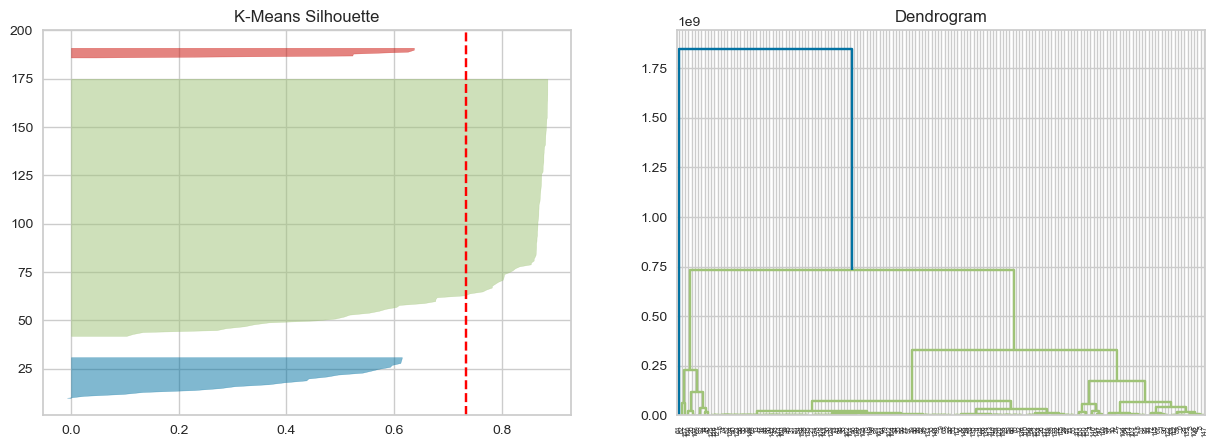

In [38]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt


# Suppose df_dendro and df_kmeans are your DataFrames
# Extract the data from the DataFrames
X_dendro = df.values
X_kmeans = df_kmeans.values

# Number of clusters for K-Means
n_clusters_kmeans = 3

# Method K-Means
km = KMeans(n_clusters=n_clusters_kmeans, init='k-means++', n_init=10, max_iter=100, random_state=42)
cluster_labels_kmeans = km.fit_predict(X_kmeans)

# Silhouette plot for K-Means
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Silhouette for K-Means
visualizer_kmeans = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[0])
visualizer_kmeans.fit(X_kmeans)
ax[0].set_title("K-Means Silhouette")

# Method of dendrogram (Agglomerative Hierarchical Clustering)
linked = linkage(X_dendro, 'ward')
dendrogram(linked, ax=ax[1])
ax[1].set_title("Dendrogram")

plt.show()

Le graphique de silhouette montre que la KMEANS est solide, avec trois clusters proche de la ligne de silhouette moyenne, ce qui indique une bonne séparation entre les clusters et une classification appropriée

#### 3.2 Recommandation

J'utilise l'ACP pour afficher les clusters de la méthode choisi : KMEANS

In [39]:
#Choix du nombre de composantes à calculer 
n_comp = len(df_kmeans.columns)

In [40]:
#On prépare les données en faisant une normalisation (centrage-réduction)

X = df_kmeans.values
names = df_kmeans.index
features = df_kmeans.columns

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [41]:
#Les moyennes
np.mean(X_scaled, axis=0)

array([-6.57909941e-17, -2.74129142e-17, -2.74129142e-18, -5.48258284e-18,
       -3.56367884e-17, -1.09651657e-17, -5.31125212e-18,  1.09651657e-17,
       -1.09651657e-17])

In [42]:
#Les écarts types
np.std(X_scaled, axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
#On applique l'ACP sur nos données transformées
pca = decomposition.PCA(n_components = n_comp)
pca.fit(X_scaled)

PCA(n_components=9)

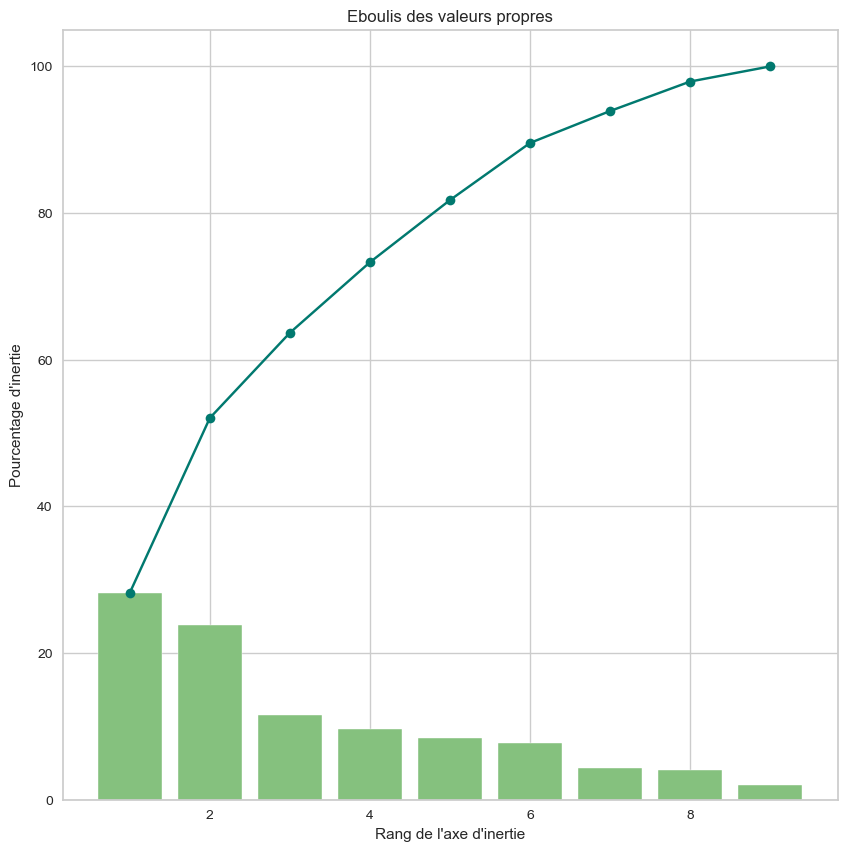

In [44]:
# On affiche l'éboulis des valeurs propres
# On pourra voir le pourcentage d'inertie pour chaque composante

fig, ax = plt.subplots(figsize=(10,10))
Variance = pca.explained_variance_ratio_*100
Valeur_propre = pca.explained_variance_
plt.bar(np.arange(len(Variance))+1, Variance, color='#85C17E')
plt.plot(np.arange(len(Variance))+1, Variance.cumsum(),marker='o', color='#01796F')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")

plt.show(block=False)

Le pourcentage de l'inertie est une mesure pour évaluer l'importance relative de chaque composante principale dans la représentation des données.

Plus la mesure est proche ou supérieure à 100, plus cette mesure doit être retenue.

Ici on garde F1, F2 sachant qu’il est possible aussi d’avoir F3 et F4.

In [67]:
for i in range(0,9):
    print(f"F{i+1}:")
    print("Valeur Propre =", round(Valeur_propre[i],2))
    print("Variance =", round(Variance[i],2), '\n') 

F1:
Valeur Propre = 2.55
Variance = 28.21 

F2:
Valeur Propre = 2.16
Variance = 23.84 

F3:
Valeur Propre = 1.05
Variance = 11.62 

F4:
Valeur Propre = 0.87
Variance = 9.62 

F5:
Valeur Propre = 0.77
Variance = 8.48 

F6:
Valeur Propre = 0.71
Variance = 7.79 

F7:
Valeur Propre = 0.39
Variance = 4.36 

F8:
Valeur Propre = 0.36
Variance = 4.02 

F9:
Valeur Propre = 0.19
Variance = 2.06 



##### 3.2.1 Cercle de corrélation

In [45]:
#cercle de corrélation
pcs = pca.components_

In [46]:
#projection
X_projected = pca.transform(X_scaled)

In [47]:
#figure initialization
plt.figure(figsize=(20,30))

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

In [48]:
#Formule pour afficher
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                      plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            an = np.linspace(0, 2 * np.pi, 100)  # Add a unit circle for scale
            plt.plot(np.cos(an), np.sin(an))
            plt.axis('equal')

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

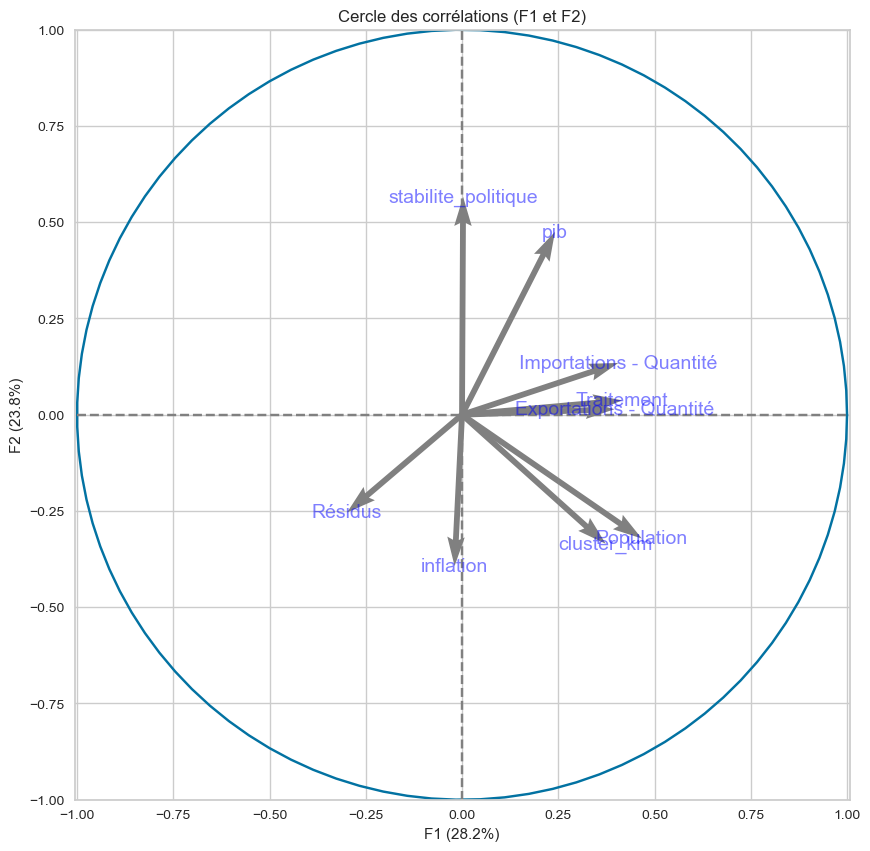

In [49]:
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

Un cercle de corrélation est un outil visuel utilisé dans l'analyse factorielle pour représenter les variables originales dans l'espace des composantes principales. 

L'analyse factorielle est une technique de réduction de la dimensionnalité qui vise à expliquer la structure des corrélations entre les variables observées en termes de quelques facteurs non observés appelés "facteurs" ou "composantes principales".

La projection nous montre que le PIB, l’importation, l’exportation, le traitement, population sont corrélés positivement  à F1 alors que pour les résidus et l’inflation c’est l’inverse.

Pour F2,la stabilité politique est fortement corrélée avec le PIB.

F2 englobe toutes les informations sur la stabilité politique.

##### 3.2.2 Projection des individus

In [50]:
#formule
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(10,10))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

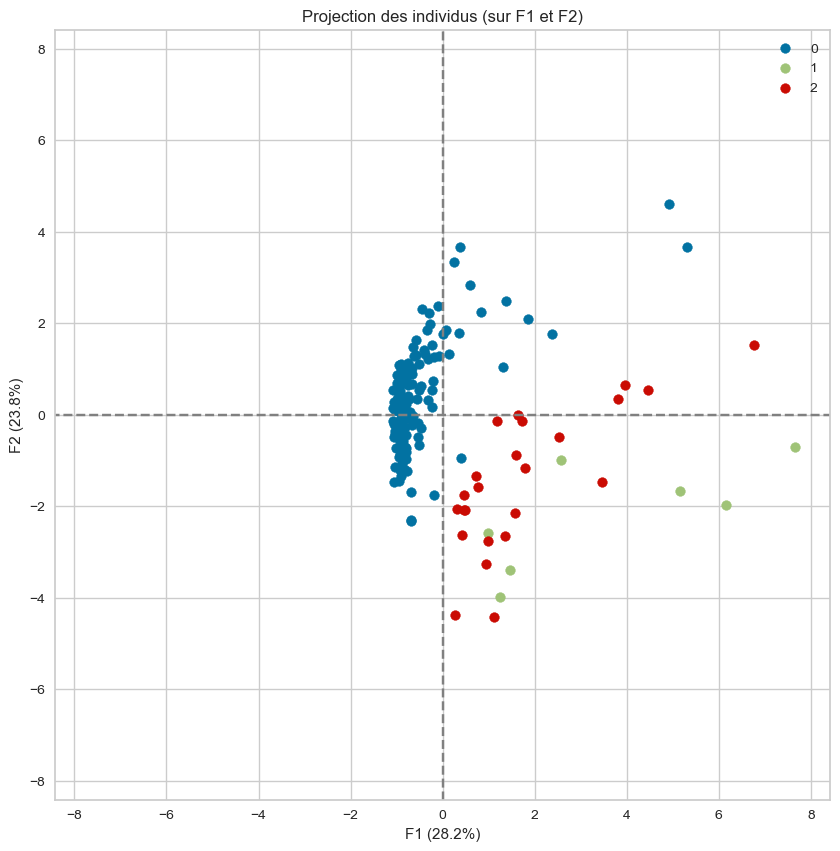

In [51]:
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=df_kmeans['cluster_km'])

Les pays du clusters 1 sont des pays avec une bonne stabilité politique et  un bon PIB et aussi de bonnes importations mais avec des résidus, et aussi un peu d’inflation.

Les pays des clusters 2 et 3 se ressemblent avec un bon import / export, peu de stabilité politique, faible PIB, bonne population mais forte inflation.

In [52]:
#Affichage des clusters dans le tableau
df_kmeans

,inflation,pib,Population,stabilite_politique,Exportations - Quantité,Importations - Quantité,Résidus,Traitement,cluster_km
Zone,,,,,,,,,
Afghanistan,6.957529,2096.1,36296113.0,-2.80,0.0,29.0,0.0,0.0,0
Afrique du Sud,6.902628,13950.5,57009756.0,-0.28,63.0,514.0,0.0,0.0,2
Albanie,3.924577,12771.0,2884169.0,0.38,0.0,38.0,0.0,0.0,0
Algérie,5.040496,11809.5,41389189.0,-0.92,0.0,2.0,0.0,0.0,2
Allemagne,2.762497,53071.5,82658409.0,0.59,646.0,842.0,-38.0,167.0,2
...,...,...,...,...,...,...,...,...,...
Éthiopie,11.285758,1988.0,106399924.0,-1.68,0.0,1.0,0.0,0.0,2
Îles Salomon,-0.649605,2625.1,636039.0,0.20,0.0,6.0,0.0,0.0,0
Guyana,1.900000,12193.6,775222.0,-0.04,0.0,0.0,0.0,0.0,0


##### 3.2.3 Centroids

In [53]:
#Afficher les centroids
centroids = km.cluster_centers_
centroids

array([[ 6.96503558e+00,  2.28357182e+04,  7.61821295e+07,
        -4.64090909e-01,  1.73409091e+02,  2.82500000e+02,
        -4.36363636e+00,  2.06818182e+01,  1.95454545e+00],
       [ 4.15044492e+00,  2.01624612e+04,  1.04087750e+07,
         5.92537313e-02,  4.08731343e+01,  5.89179104e+01,
        -2.74626866e+00,  2.76119403e+00,  4.47761194e-02],
       [ 5.42590400e+00,  1.66961833e+04,  2.26005737e+08,
        -1.05833333e+00,  1.31983333e+03,  2.15000000e+01,
        -4.44089210e-16,  6.38333333e+01,  1.00000000e+00]])

In [54]:
labels = km.labels_
labels

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 2, 0, 1, 1, 1, 1])

In [55]:
# On utilise bien le scaler déjà entrainé : 
centroids_scaled = scaler.fit_transform(centroids)

# et on utilise l'ACP déjà entrainée : 
centroids_proj = pca.transform(centroids_scaled)

# Création d'un dataframe pour plus de clarté:
centroids_proj = pd.DataFrame(centroids_proj, 
                              columns = ["F1", "F2", "F3","F4","F5","F6","F7","F8","F9"], 
                              index=["cluster_0", "cluster_1", "cluster_2"])

In [56]:
#Je le met dans un dataframe pour afficher les centroids
x_projected = pd.DataFrame(X_projected)
x_projected

,0,1,2,3,4,5,6,7,8
0,-0.696365,-2.291495,-0.118716,0.946526,0.987930,-0.501911,-0.660908,1.493145,-0.356248
1,1.788935,-1.154977,-1.494701,-1.351265,-0.087765,-1.305625,-0.097258,-0.943243,-0.217818
2,-0.856065,0.355612,0.094804,0.061374,0.053309,0.115216,-0.024400,-0.429000,0.023992
3,0.452916,-1.758826,-0.220691,-0.787889,-0.140253,-0.664802,1.478594,0.134486,-0.454603
4,6.758754,1.521145,-1.710459,-0.755220,2.040890,1.525187,-0.086173,-0.565213,-1.224390
...,...,...,...,...,...,...,...,...,...
157,0.942177,-3.267523,-0.270464,-0.462848,-0.279334,-0.382123,1.023823,0.408116,0.346872
158,-1.051772,0.279164,0.481978,0.194287,0.652392,-0.265473,0.232909,-0.560380,-0.020568
159,-0.960830,0.188016,0.288949,0.165056,0.328985,-0.093946,0.099534,-0.091668,-0.118685
160,-1.059874,-1.466555,-0.004616,0.807285,0.988435,-0.467064,-0.288878,0.901739,-0.599238


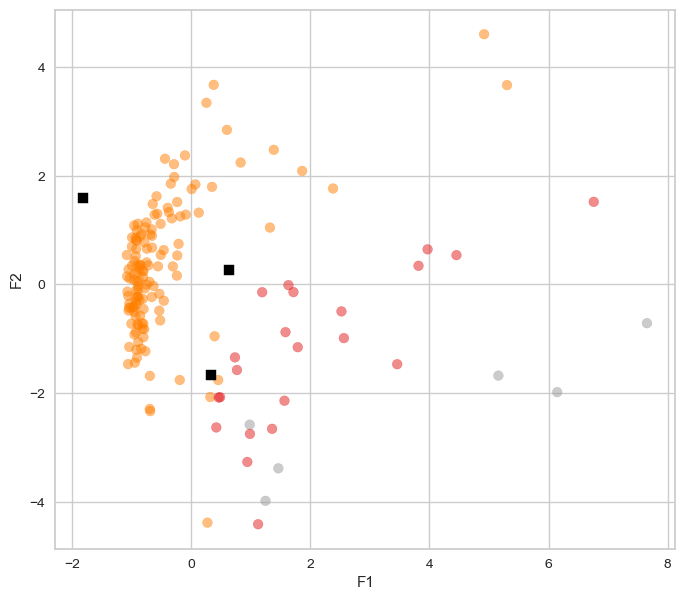

In [57]:
#On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

#On affiche nos individus, avec une transparence de 50% (alpha=0.5) : 
ax.scatter(x_projected.iloc[:, 0], x_projected.iloc[:, 1], c= labels, cmap="Set1", alpha =0.5)

#On affiche nos centroides, avec une couleur noire (c="black") et une frome de carré (marker="c") : 
ax.scatter(centroids_proj.iloc[:, 0], centroids_proj.iloc[:, 1],  marker="s", c="black" )

#On spécifie les axes x et y :
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.show()

On constate qu’il y a un seul groupe de pays qui est positif par rapport à F1 et F2.

## 3.2 Conclusion et recommandations

Il semblerait que le cluster 3 de la méthode KMEANS puisse être une première piste de réflexion pour l’exportation des poulets. 

Il regroupe principalement des pays d’Europe qui ont une stabilité politique plutôt correct, qui importent et exportent aussi beaucoup, comme l'Allemagne, la France ou encore la Grande Bretagne.

En europe plusieurs facteurs favorisent cela comme, l'Union européenne (UE) a créé un marché unique qui permet la libre circulation des biens, des services, des personnes et des capitaux entre les États membres. Cela signifie qu'il n'y a pas de barrières commerciales telles que les droits de douane ou les quotas entre les pays membres de l'UE, ce qui facilite grandement le commerce.

Ensuite il y a aussi, l'UE fonctionne comme une union douanière, ce qui signifie qu'elle a des tarifs douaniers communs et des règles douanières harmonisées pour les échanges avec des pays extérieurs à l'UE. Cela simplifie les procédures douanières et réduit les coûts pour les entreprises qui importent ou exportent des produits.

L'UE promeut l'harmonisation des normes et des certifications, ce qui facilite la conformité des produits aux exigences réglementaires et leur accès aux marchés européens.

L'Europe dispose d'une infrastructure de transport moderne et bien développée, y compris des ports maritimes, des aéroports, des réseaux ferroviaires et routiers efficaces, ce qui facilite le transport de marchandises à travers le continent.

L'UE a conclu des accords commerciaux avec de nombreux pays et régions du monde, ce qui offre des opportunités supplémentaires d'exportation pour les entreprises européennes et facilite l'importation de produits étrangers.

-------------------------------------------------------------------------------------------------------------------------------

Pour les pays asiatiques, on pourrai se diriger vers des pays dont les réglementations en terme d'exportations et d'importations sont moins contraignantes au départ, ensuite il faudrait voir dans quel pays la demande de poulet pourrait être la plus élevée, aussi savoir qui serait prêt à payer pour des pays de qualité comme les nôtres. Nous devront aussi regarder le développement économique du pays cela serait un argument de taille pour l'installation de notre sociètè au sein des pays asiatiques.

En résumé nous devont avoir l'oeil sur plusieurs facteurs important, développement éconimique, régle d'import/export, qualité de vie des habitants (pouvoir d'achat par exemple). Nous pouvons aussi nous importer dans un pays et ensuite toucher ceux d'à côté.